In [1]:
# import weather
# import mongodb
import pandas as pd
import numpy as np
import musical_weather

In [2]:
# first_time = True
# if first_time:
#     historical_weather, condensed, todays_forecast = weather.weather_main()
#     print("Storing historical weather data...")
#     weather.store_weather_data(historical_weather, "historical_raw")
#     print("Storing historical summary data...")
#     weather.store_weather_data(condensed, "historical_summary")
#     print("Storing forecast weather data...")
#     weather.store_weather_data(todays_forecast, "forecast")
#     print("Weather data stored.")

## Get historical weather and forecast data

In [3]:
# todays_forecast = weather.get_forecast()
# pd.DataFrame(todays_forecast)

In [4]:
historical_weather, historical_summary = musical_weather.get_stored_weather()
todays_forecast = musical_weather.get_forecast(historical_weather)

In [5]:
historical_weather.head()

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,season,description,weather_score,event,weight,weather_score_weighted,average_t_score
0,2014-06-01,2,64.650200,49.170200,57.138947,61.689705,45.978081,53.891354,0,0,...,18.567101,317.268646,24.600000,summer,Partly Cloudy,1,Cloud,106733.328125,213466.656250,-0.329841
1,2014-06-02,51,64.830200,48.180199,57.652695,62.277229,45.301971,54.428406,0,0,...,18.119701,17.676233,18.940001,summer,Light Drizzle,1,Rain,-60607.578125,-121215.156250,-0.662617
2,2014-06-03,53,66.270203,49.800201,59.058949,63.626461,47.680580,57.165218,0,0,...,14.987900,4.000119,16.260000,summer,Drizzle,1,Rain,-71824.382812,-143648.765625,-0.632962
3,2014-06-04,2,69.150200,55.200199,62.538940,67.358307,54.227848,60.809299,0,0,...,14.764199,117.019676,20.100000,summer,Partly Cloudy,1,Cloud,90910.937500,181821.875000,-0.360275
4,2014-06-05,61,67.260201,52.320198,59.928955,63.255253,49.723610,56.905182,0,0,...,26.844000,222.463196,16.719999,summer,Light Rain,1,Rain,-63945.484375,-127890.968750,-0.168605


In [6]:
pd.DataFrame(todays_forecast).head()

,temperature_2m_max,sunrise,weather_score,daylight_duration,precipitation_sum,wind_gusts_10m_max,description,average_t_score,weight,event,...,precipitation_hours,snowfall_sum,sunset,season,wind_direction_10m_dominant,wind_speed_10m_max,date,temperature_2m_min,apparent_temperature_max,apparent_temperature_min
0,76.541901,0,1,59585.378906,0.003937,28.6336,Light Showers,0.300818,-85790.265625,Rain,...,1.0,0.0,0,summer,303.869476,13.287101,2024-06-02 07:00:00,55.9319,74.898544,53.38242


In [7]:
todays_forecast['weather_score_weighted'][0]

-171580.53125

In [8]:
todays_forecast.select_dtypes(include=[np.number]).columns

Index(['temperature_2m_max', 'sunrise', 'weather_score', 'daylight_duration',
       'precipitation_sum', 'wind_gusts_10m_max', 'average_t_score', 'weight',
       'weather_code', 'shortwave_radiation_sum', 'sunshine_duration',
       'rain_sum', 'weather_score_weighted', 'precipitation_hours',
       'snowfall_sum', 'sunset', 'wind_direction_10m_dominant',
       'wind_speed_10m_max', 'temperature_2m_min', 'apparent_temperature_max',
       'apparent_temperature_min'],
      dtype='object')

# Validating musical_weather.main

In [9]:
todays_score, historical_summary = musical_weather.main()
todays_score

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-171580.53125

## Model fit and summary

In [10]:
historical_weather.columns

Index(['date', 'weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'daylight_duration', 'sunshine_duration', 'precipitation_sum',
       'rain_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'wind_direction_10m_dominant',
       'shortwave_radiation_sum', 'season', 'description', 'weather_score',
       'event', 'weight', 'weather_score_weighted', 'average_t_score'],
      dtype='object')

In [11]:
model_base, model_fit = musical_weather.create_weather_model(historical_weather)
model_base

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     weather_score_weighted   No. Observations:                 3654
Model:                     ARIMA(5, 1, 0)   Log Likelihood              -48382.157
Date:                    Sun, 02 Jun 2024   AIC                          96776.315
Time:                            16:14:09   BIC                          96813.534
Sample:                        06-01-2014   HQIC                         96789.569
                             - 06-01-2024                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6245      0.013    -46.704      0.000      -0.651      -0.598
ar.L2         -0.4570      0.016    -29.429      0.000      -0.487      -0.427
ar.L3         -0.3545      0.016    -21.933      0.000      -0.386      -0.323
ar.L4         -0.2289      0.016    -14.604      0.000      -0.260      -0.198
ar.L5         -0.1422      0.013    -10.614      0.000      -0.168      -0.116
sigma2      1.877e+10   3.41e-13   5.51e+22      0.000    1.88e+10    1.88e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):                51.70
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.03
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.75e+37. Standard errors may be unstable.
"""

In [13]:
model_fit.params

ar.L1    -6.245476e-01
ar.L2    -4.569787e-01
ar.L3    -3.544997e-01
ar.L4    -2.289235e-01
ar.L5    -1.421833e-01
sigma2    1.876900e+10
dtype: float64

In [14]:
todays_forecast.columns

Index(['temperature_2m_max', 'sunrise', 'weather_score', 'daylight_duration',
       'precipitation_sum', 'wind_gusts_10m_max', 'description',
       'average_t_score', 'weight', 'event', 'weather_code',
       'shortwave_radiation_sum', 'sunshine_duration', 'rain_sum',
       'weather_score_weighted', 'precipitation_hours', 'snowfall_sum',
       'sunset', 'season', 'wind_direction_10m_dominant', 'wind_speed_10m_max',
       'date', 'temperature_2m_min', 'apparent_temperature_max',
       'apparent_temperature_min'],
      dtype='object')

In [15]:
todays_forecast = musical_weather.predict_weather_event(todays_forecast, model_fit)
todays_forecast

,temperature_2m_max,sunrise,weather_score,daylight_duration,precipitation_sum,wind_gusts_10m_max,description,average_t_score,weight,event,...,precipitation_hours,snowfall_sum,sunset,season,wind_direction_10m_dominant,wind_speed_10m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,forecasted_event
date,,,,,,,,,,,,,,,,,,,,,
2024-06-02 07:00:00,76.541901,0,1,59585.378906,0.003937,28.6336,Light Showers,0.300818,-85790.265625,Rain,...,1.0,0.0,0,summer,303.869476,13.287101,55.9319,74.898544,53.38242,Rain


## Feature selection

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume historical_weather is your DataFrame
# Drop non-numeric columns and columns that should not be used for training
# Identify non-numeric columns
non_numeric_cols = historical_weather.select_dtypes(exclude=[np.number]).columns

# Drop the columns from the DataFrame
X = historical_weather.drop(columns=[col for col in non_numeric_cols if col in historical_weather.columns], axis=1)
y = historical_weather['event']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance}')

Feature: weather_code, Importance: 0.26389875686620157
Feature: temperature_2m_max, Importance: 0.011785338913986905
Feature: temperature_2m_min, Importance: 0.011181795709095547
Feature: temperature_2m_mean, Importance: 0.010837820370133526
Feature: apparent_temperature_max, Importance: 0.01507498638069918
Feature: apparent_temperature_min, Importance: 0.016364986908196016
Feature: apparent_temperature_mean, Importance: 0.02355939803372511
Feature: sunrise, Importance: 0.0
Feature: sunset, Importance: 0.0
Feature: daylight_duration, Importance: 0.006119588309015866
Feature: sunshine_duration, Importance: 0.005037368866876439
Feature: precipitation_sum, Importance: 0.1340683631299423
Feature: rain_sum, Importance: 0.07278390316755481
Feature: snowfall_sum, Importance: 0.06739706667948668
Feature: precipitation_hours, Importance: 0.07967991586082517
Feature: wind_speed_10m_max, Importance: 0.0023990693299716435
Feature: wind_gusts_10m_max, Importance: 0.00208445651598767
Feature: wind_d

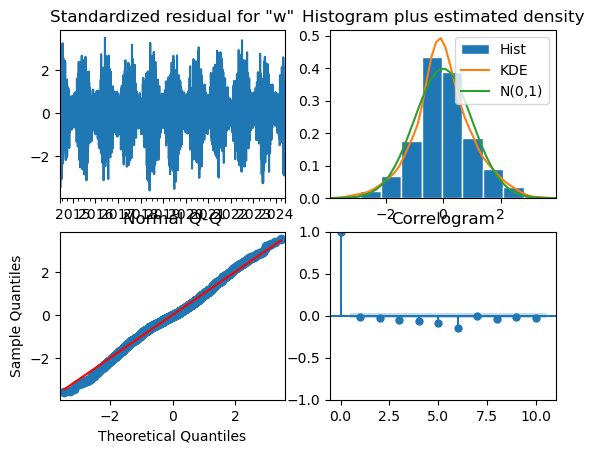

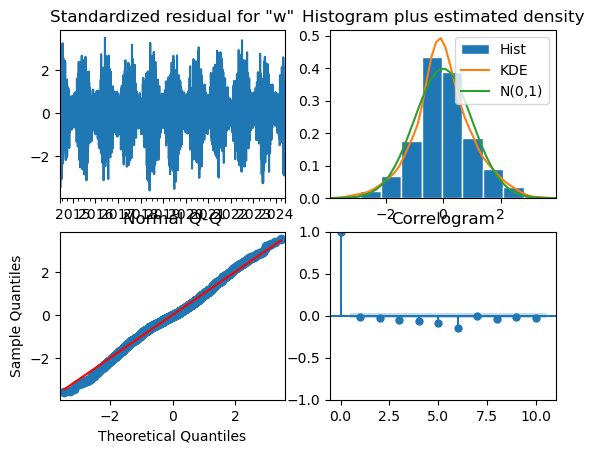

In [17]:
model_fit.plot_diagnostics()

In [18]:
model_fit.forecast(steps=10)

2024-06-02   -173902.212222
2024-06-03   -169342.253113
2024-06-04   -178823.338146
2024-06-05   -174246.147145
2024-06-06   -180591.157504
2024-06-07   -177250.000610
2024-06-08   -176537.696435
2024-06-09   -175959.872705
2024-06-10   -177028.975764
2024-06-11   -176740.549857
Freq: D, Name: predicted_mean, dtype: float64

In [19]:
todays_forecast.columns

Index(['temperature_2m_max', 'sunrise', 'weather_score', 'daylight_duration',
       'precipitation_sum', 'wind_gusts_10m_max', 'description',
       'average_t_score', 'weight', 'event', 'weather_code',
       'shortwave_radiation_sum', 'sunshine_duration', 'rain_sum',
       'weather_score_weighted', 'precipitation_hours', 'snowfall_sum',
       'sunset', 'season', 'wind_direction_10m_dominant', 'wind_speed_10m_max',
       'temperature_2m_min', 'apparent_temperature_max',
       'apparent_temperature_min', 'forecasted_event'],
      dtype='object')

## Predicting today's event

In [20]:
todays_forecast

,temperature_2m_max,sunrise,weather_score,daylight_duration,precipitation_sum,wind_gusts_10m_max,description,average_t_score,weight,event,...,precipitation_hours,snowfall_sum,sunset,season,wind_direction_10m_dominant,wind_speed_10m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,forecasted_event
date,,,,,,,,,,,,,,,,,,,,,
2024-06-02 07:00:00,76.541901,0,1,59585.378906,0.003937,28.6336,Light Showers,0.300818,-85790.265625,Rain,...,1.0,0.0,0,summer,303.869476,13.287101,55.9319,74.898544,53.38242,Rain


In [21]:

# historical_weather, historical_summary = musical_weather.get_stored_weather()
# todays_forecast = musical_weather.get_forecast()

# model_base, model_fit = musical_weather.create_weather_model(historical_weather)

# Fit the model to your data
# model_base.fit(todays_forecast['weather_score_weighted'])
# Fit the model
model_fit = model_base.fit()

# Get the fitted parameters
params = model_fit.params

# Use the model to make a prediction for the specified column in today's forecast
forecast = model_fit.predict(start=todays_forecast.index[0], end=todays_forecast.index[-1])

In [22]:
# # Initialize a dictionary to hold the models
# models = {}

# # Fit auto_arima function to each column in your historical data
# for col in historical_weather_arm.columns:
#     models[col] = auto_arima(historical_weather_arm[col], start_p = 1, start_q = 1,
#                              max_p = 3, max_q = 3, m = 12,
#                              start_P = 0, seasonal = True,
#                              d = None, D = 1, trace = True,
#                              error_action ='ignore',   # we don't want to know if an order does not work
#                              suppress_warnings = True,  # we don't want convergence warnings
#                              stepwise = True)           # set to stepwise

# # Now 'models' is a dictionary where the keys are column names and the values are fitted models

In [23]:
# model_base = ARIMA(historical_weather, order=stepwise_fit.order)

## Playlist and weather matching

In [24]:
# import musical_weather
# import pandas as pd

# historical_weather, historical_summary = musical_weather.get_stored_weather()
# todays_forecast = musical_weather.get_forecast(historical_weather)

In [25]:
# weather_music = musical_weather.get_music_selection(todays_forecast)
# weather_music

In [26]:
todays_t_score = todays_forecast['average_t_score'][0]
weather_std, weather_music, selected_songs = musical_weather.get_music_selection(todays_forecast, historical_weather, todays_t_score)

In [27]:
todays_t_score

0.3008181894257723

In [28]:
weather_std

0.36017821418554

In [29]:
weather_music

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,event_le,score,t_score,average_t_score
0,-9.514,0.0452,0.272000,0.6380,3,Lord Huron,3hRV0jL3vUpRrcy398teAU,The Night We Met,Rain,Weather,...,0.0998,174.097,208212,-2.101430,0.987487,1,3,-1907.053980,NaN,-0.076572
1,-7.028,0.0277,0.000023,0.1330,4,Creedence Clearwater Revival,2LawezPeJhN4AWuSB0GtAU,Have You Ever Seen The Rain,Rain,Weather,...,0.7740,116.109,160133,0.196259,0.975475,1,3,-3013.900961,NaN,-0.008014
2,-13.858,0.0426,0.000001,0.1140,3,keshi,72sfmdpuO5r8cBDgs7MqZZ,UNDERSTAND,Rain,Weather,...,0.1630,82.085,150520,-2.101430,0.774775,1,3,-2368.808960,NaN,-0.641420
3,-6.032,0.0281,0.005370,0.1080,4,Hozier,37zuIvk4KBkAxxLJsxJaHq,Would That I,Rain,Weather,...,0.5020,130.694,268293,0.196259,0.726226,1,3,-3220.633336,NaN,-0.199225
4,-23.625,0.0598,0.765000,0.1080,3,Elliott Smith,52Bg6oaos7twR7IUtEpqcE,Between The Bars,Rain,Weather,...,0.3420,135.298,141280,-2.101430,0.552052,1,3,-1623.513514,NaN,-0.452496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,-11.570,0.0281,0.000229,0.1670,3,Lamp,3tu3nbfeAwQ8xgi2YrnQBA,Old Notebook,Drizzle,Weather,...,0.3450,150.333,279186,-2.101430,0.190691,1,1,-2803.517200,NaN,-0.082184
4725,-12.149,0.0322,0.000722,0.1260,4,Lamp,05TWN8gERjdwtKYBsEmxwW,Amidst the Morning Fog,Drizzle,Weather,...,0.1390,130.314,283900,0.196259,0.190691,1,1,-2808.384035,NaN,-0.253031
4726,-12.120,0.0325,0.144000,0.1190,4,Lamp,1nPXBgflWZSAomAon6i7qw,Alone in My Room,Drizzle,Weather,...,0.0866,120.308,281482,0.196259,0.266266,1,1,-2749.378159,NaN,-0.055982
4727,-15.870,0.0311,0.414000,0.1300,4,Lamp,6gjLFDKn5F1yFY3p1mOE00,Night Drizzle,Drizzle,Weather,...,0.0729,131.115,176411,0.196259,0.195195,1,1,-1680.667719,NaN,-0.239097


In [30]:
selected_songs

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,event_le,score,t_score,average_t_score
16,-12.111,0.0388,0.168000,0.0924,4,José González,0ZNYGrmcehorhh9JOeg5Iv,Stay Alive,Rain,Weather,...,0.3140,129.984,266907,0.196259,0.552052,1,3,-2857.223493,NaN,-0.182912
21,-12.431,0.0264,0.000231,0.1240,4,Neil Young,5l9c6bJmzvftumhz4TMPgk,Harvest Moon,Rain,Weather,...,0.4080,112.938,303213,0.196259,0.680180,1,3,-3563.973947,NaN,-0.180569
23,-11.879,0.0369,0.000044,0.0872,4,Birdy,5sF7hdYvhrcgNq8NZjfK8L,Not About Angels,Rain,Weather,...,0.2190,116.860,189475,0.196259,0.611612,1,3,-2108.104563,NaN,-0.317397
24,-9.558,0.0430,0.452000,0.1070,4,Alex G,36TbBJ7mLPOZMAYs0p4mxb,Mary,Rain,Weather,...,0.4020,105.955,197733,0.196259,0.702202,1,3,-2866.867914,NaN,-0.105371
27,-16.670,0.0498,0.004690,0.0248,4,Ed Sheeran,0Tel1fmuCxEFV6wBLXsEdk,Kiss Me,Rain,Weather,...,0.1820,74.993,280853,0.196259,0.572573,1,3,-4302.136205,NaN,-0.129534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,-11.570,0.0281,0.000229,0.1670,3,Lamp,3tu3nbfeAwQ8xgi2YrnQBA,Old Notebook,Drizzle,Weather,...,0.3450,150.333,279186,-2.101430,0.190691,1,1,-2803.517200,NaN,-0.082184
4725,-12.149,0.0322,0.000722,0.1260,4,Lamp,05TWN8gERjdwtKYBsEmxwW,Amidst the Morning Fog,Drizzle,Weather,...,0.1390,130.314,283900,0.196259,0.190691,1,1,-2808.384035,NaN,-0.253031
4726,-12.120,0.0325,0.144000,0.1190,4,Lamp,1nPXBgflWZSAomAon6i7qw,Alone in My Room,Drizzle,Weather,...,0.0866,120.308,281482,0.196259,0.266266,1,1,-2749.378159,NaN,-0.055982
4727,-15.870,0.0311,0.414000,0.1300,4,Lamp,6gjLFDKn5F1yFY3p1mOE00,Night Drizzle,Drizzle,Weather,...,0.0729,131.115,176411,0.196259,0.195195,1,1,-1680.667719,NaN,-0.239097
